### Type of Models

sequential vs Functional

### Type of Layer

Desnse

Dropout

Conv 2D

Flattern

MaxPooling

ZeroPadding

SimpleRNN

batch Normalization





In [ ]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
path = '/content/lung_data.csv'
df = read_csv(path)

In [ ]:
df.shape

(324, 35)

In [ ]:
df.describe()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,54.743827,0.586420,2.530864,0.864198,0.052469,30.188272,0.703704,0.759259,0.280864,5.442901,...,518.472222,3.937562,2.076883,48.444444,0.944444,0.870370,0.595679,0.521605,64.188272,1.296296
std,11.002637,0.493237,2.429623,0.343109,0.261622,16.419945,0.457330,0.565308,0.450116,4.717792,...,536.279128,1.575008,0.915411,27.232516,0.229416,0.336415,0.491519,0.500306,22.661837,0.457330
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,110.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000
25%,47.000000,0.000000,0.000000,1.000000,0.000000,19.750000,0.000000,0.000000,0.000000,2.875000,...,322.000000,3.400000,1.607500,29.000000,1.000000,1.000000,0.000000,0.000000,42.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,0.000000,34.000000,1.000000,1.000000,0.000000,5.000000,...,510.000000,4.200000,2.200000,38.000000,1.000000,1.000000,1.000000,1.000000,68.000000,1.000000
75%,63.000000,1.000000,5.000000,1.000000,0.000000,43.000000,1.000000,1.000000,1.000000,7.000000,...,545.000000,4.925000,2.725000,75.000000,1.000000,1.000000,1.000000,1.000000,79.000000,2.000000
max,85.000000,1.000000,8.000000,1.000000,2.000000,70.000000,1.000000,2.000000,1.000000,52.000000,...,7541.000000,6.700000,4.400000,151.000000,1.000000,1.000000,1.000000,1.000000,103.000000,2.000000


In [ ]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)

In [ ]:
df.describe()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,0.541573,0.586420,0.316358,0.864198,0.026235,0.431261,0.703704,0.379630,0.280864,0.095979,...,0.054969,0.587696,0.472019,0.311708,0.944444,0.870370,0.595679,0.521605,0.578133,0.296296
std,0.166707,0.493237,0.303703,0.343109,0.130811,0.234571,0.457330,0.282654,0.450116,0.091608,...,0.072168,0.235076,0.208048,0.182769,0.229416,0.336415,0.491519,0.500306,0.246324,0.457330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.424242,0.000000,0.000000,1.000000,0.000000,0.282143,0.000000,0.000000,0.000000,0.046117,...,0.028529,0.507463,0.365341,0.181208,1.000000,1.000000,0.000000,0.000000,0.336957,0.000000
50%,0.545455,1.000000,0.250000,1.000000,0.000000,0.485714,1.000000,0.500000,0.000000,0.087379,...,0.053829,0.626866,0.500000,0.241611,1.000000,1.000000,1.000000,1.000000,0.619565,0.000000
75%,0.666667,1.000000,0.625000,1.000000,0.000000,0.614286,1.000000,0.500000,1.000000,0.126214,...,0.058539,0.735075,0.619318,0.489933,1.000000,1.000000,1.000000,1.000000,0.739130,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

age                                 float64
gender                              float64
city                                float64
asbestos exposure                   float64
type of MM                          float64
duration of asbestos exposure       float64
diagnosis method                    float64
keep side                           float64
cytology                            float64
duration of symptoms                float64
dyspnoea                            float64
ache on chest                       float64
weakness                            float64
habit of cigarette                  float64
performance status                  float64
white blood                         float64
cell count (WBC)                    float64
hemoglobin (HGB)                    float64
platelet count (PLT)                float64
sedimentation                       float64
blood lactic dehydrogenise (LDH)    float64
alkaline phosphatise (ALP)          float64
total protein                   

In [ ]:
df.drop(['dead or not'],axis=1,inplace=True)

# Handle Data Imbalance

In [ ]:
df['class of diagnosis'].value_counts(normalize=True)

class of diagnosis
0.0    0.703704
1.0    0.296296
Name: proportion, dtype: float64

## Here Subsampling / Undersampling method is used for balancing

We took few samples from the majority
And all samples from the minority class

In [ ]:
df_c1 = df.loc[df['class of diagnosis']==0,:]
df_c2 = df.loc[df['class of diagnosis']==1,:]

#### Sample Majority class with number of records in minority class

In sampling we randomly select given number of records

In [ ]:
df_c1 = df_c1.sample(df_c2.shape[0],random_state=7)

In [ ]:
df_c1.shape , df_c2.shape

((96, 34), (96, 34))

In [ ]:
df_new = pd.concat([df_c1,df_c2])

In [ ]:
df_new.shape

(192, 34)

In [ ]:
df_new['class of diagnosis'].value_counts()

class of diagnosis
0.0    96
1.0    96
Name: count, dtype: int64

# Separate X & y

In [ ]:
# split into input and output columns
X, y = df_new.values[:, :-1], df_new.values[:, -1]

In [ ]:
y[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Train test Split

In [ ]:
# split into train and test datasets
#sytatified=y ,y is target ..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=7,stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(134, 33) (58, 33) (134,) (58,)


## Configure the input layer

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]

In [ ]:
n_features

33

In [ ]:
n_features * 5 + 5 #(bias values)

170

# Size of output layer / no of neurons in output layer

classification ::
no of classes if we want OHE

or 1 neuron if we dont want OHE

regression ::

1 neuron if we want one output

multiple outputs then no of neurons is same as no of outputs

# Output layer activation:

depends on the output ::

if 0 or 1 :: use sigmoid

if you want one hot encoding :: softmax

if you want number use linear

#### How Many layers to choose ?

Each layer is a feature selection step

If you want more processing of input data for better feature selection then add more layers.

In [ ]:
# define model
model1 = Sequential()#we want to build seq model
model1.add(Dense(5, activation='relu', input_shape=(n_features,)))#add a layer.dense 1st hidden layer first param is input_shape. , is given bez tuple(,).5 neuron
# model1.add(Dense(100, activation='relu'))
# model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
# model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
# model1.add(Dense(2, activation='softmax'))

## Task ::

1. change number of neurons in Hidden layer 1 :: atleast 3 diferent values :: check test accuracy

2. Add 1 layer (any no of neurons): check test accuracy

3. add two layers (any no of neurons): check test accuracy

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 170       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 176 (704.00 Byte)
Trainable params: 176 (704.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Optimizers
Optimize the error or loss

SGD stochastic Gardient Descent

** Momentum in SGD

Adam  Adaptive Moment Optimization/Estimation :: Best Currently

RMSProp Root Mean Square Propogation

#### Loss

binary_crossentropy : when two classes in output

Categorical Cross Entropy: for multi class classification problem

Sparse Categorical Cross Entropy :: when multi class classification without one hot encoding

mse Mean Squared Error : for regression problem

In [ ]:
# compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fit the model (traning)
history = model1.fit( X_train, y_train, epochs=100, batch_size=32,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
3/3 - 1s - loss: 0.6617 - accuracy: 0.5699 - val_loss: 0.6545 - val_accuracy: 0.5610 - 974ms/epoch - 325ms/step
Epoch 2/100
3/3 - 0s - loss: 0.6577 - accuracy: 0.5699 - val_loss: 0.6552 - val_accuracy: 0.5610 - 49ms/epoch - 16ms/step
Epoch 3/100
3/3 - 0s - loss: 0.6542 - accuracy: 0.6129 - val_loss: 0.6557 - val_accuracy: 0.5854 - 45ms/epoch - 15ms/step
Epoch 4/100
3/3 - 0s - loss: 0.6510 - accuracy: 0.6237 - val_loss: 0.6562 - val_accuracy: 0.6341 - 46ms/epoch - 15ms/step
Epoch 5/100
3/3 - 0s - loss: 0.6481 - accuracy: 0.6237 - val_loss: 0.6568 - val_accuracy: 0.6098 - 53ms/epoch - 18ms/step
Epoch 6/100
3/3 - 0s - loss: 0.6454 - accuracy: 0.6129 - val_loss: 0.6572 - val_accuracy: 0.5854 - 52ms/epoch - 17ms/step
Epoch 7/100
3/3 - 0s - loss: 0.6428 - accuracy: 0.6129 - val_loss: 0.6574 - val_accuracy: 0.5854 - 44ms/epoch - 15ms/step
Epoch 8/100
3/3 - 0s - loss: 0.6402 - accuracy: 0.6237 - val_loss: 0.6573 - val_accuracy: 0.5854 - 37ms/epoch - 12ms/step
Epoch 9/100
3/3 - 0s -

In [ ]:
# evaluate the model
loss, acc = model1.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.862


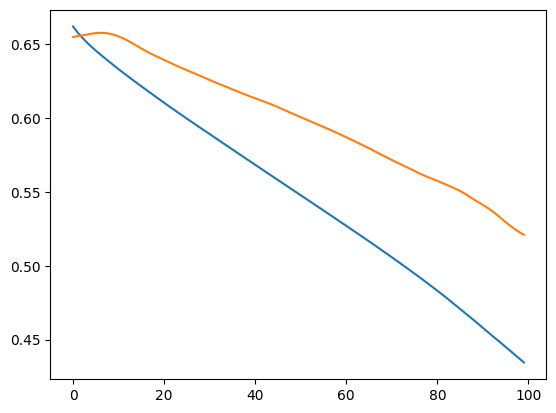

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # loss is training loss
plt.plot(history.history['val_loss']) # val_loss loss on the validation data / test loss

# Create another model

In [161]:
# define model
model1 = Sequential()
model1.add(Dense(5, activation='relu', input_shape=(n_features,)))
# model1.add(Dense(100, activation='relu'))
# model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
# model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
# model1.add(Dense(2, activation='softmax'))

In [162]:

model1 = build_model()

In [163]:
# compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [164]:
# fit the model
history = model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, verbose=0,shuffle=False)

In [165]:

# evaluate the model
loss, acc = model1.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.207


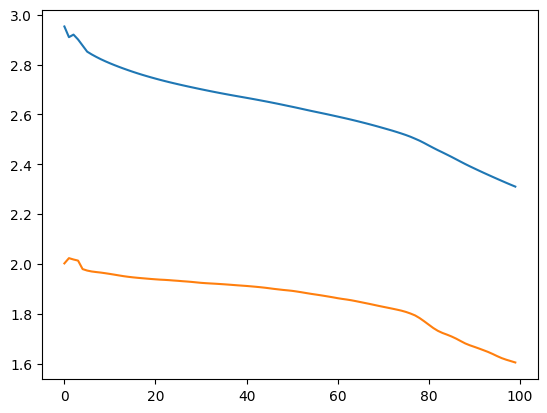

In [166]:


import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# DO multiple iterations to get average performance

In [ ]:
from sklearn.metrics import f1_score
import tensorflow as tf

In [ ]:
for i in range(10):
  model1 = build_model()
  model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                  tf.keras.metrics.Precision()])
  history = model1.fit(X_train, y_train, epochs=100, batch_size=32,
                       validation_split=0.3, verbose=0,shuffle=False)
  loss, acc, precision = model1.evaluate(X_test, y_test, verbose=0)
  print(i, 'th Iteration Test Accuracy and precision: ', acc, precision)


0 th Iteration Test Accuracy and precision:  1.0 1.0
1 th Iteration Test Accuracy and precision:  0.8620689511299133 0.800000011920929
2 th Iteration Test Accuracy and precision:  1.0 1.0
3 th Iteration Test Accuracy and precision:  1.0 1.0
4 th Iteration Test Accuracy and precision:  1.0 1.0
5 th Iteration Test Accuracy and precision:  1.0 1.0
6 th Iteration Test Accuracy and precision:  1.0 1.0
7 th Iteration Test Accuracy and precision:  1.0 1.0
8 th Iteration Test Accuracy and precision:  1.0 1.0
9 th Iteration Test Accuracy and precision:  1.0 1.0


# Why we get variation in accuracy ?

because we randomly initialise the weights

weights are initialised using uniform distribution between 0-1 value randomly